In [1]:
################# Source code for Machine learning Project on Customer Churn Reduction #################

In [2]:
################# Importing the required Libraries #################

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Importing the Data set
os.chdir("D:/Dataset/project Dataset/Churn Prediction")
train_set = pd.read_csv("Train_data.csv") 
test_set = pd.read_csv("Test_data.csv")

In [5]:
################# Data Preprocessing #################

In [6]:
# checking dimension of data 
print(train_set.shape) 
print(test_set.shape)

(3333, 21)
(1667, 21)


In [7]:
#Checking the datatypes of the variable
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [8]:
#checking the statistics of continuous variable
train_set.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# extracting the variables with object datatype and storing it in separate variable
categorical = list(train_set.columns[train_set.dtypes =='object'])
categorical.insert(2,'area code')
categorical

['state',
 'phone number',
 'area code',
 'international plan',
 'voice mail plan',
 'Churn']

In [10]:
#changing the required variables to categorical Datatypes
test_set[categorical] = test_set[categorical].apply(pd.Categorical) 
train_set[categorical] = train_set[categorical].apply(pd.Categorical)

In [11]:
#checking the total of unique variables in each categorical variables
train_set[categorical].nunique()

state                   51
phone number          3333
area code                3
international plan       2
voice mail plan          2
Churn                    2
dtype: int64

In [12]:
#Counting the each unique value in last three categories`
train_set[categorical[3:6]].apply(pd.Series.value_counts)

,international plan,voice mail plan,Churn
no,3010.0,2411.0,NaN
yes,323.0,922.0,NaN
False.,NaN,NaN,2850.0
True.,NaN,NaN,483.0


In [13]:
#checking the count of unique values categorical variable
print("value counts of categorical column")
print()
for i in categorical[2:6]:
    print (i)
    print (train_set[i].value_counts())
    print("============")

value counts of categorical column

area code
415    1655
510     840
408     838
Name: area code, dtype: int64
international plan
 no     3010
 yes     323
Name: international plan, dtype: int64
voice mail plan
 no     2411
 yes     922
Name: voice mail plan, dtype: int64
Churn
 False.    2850
 True.      483
Name: Churn, dtype: int64


In [13]:
# Getting the percentage of target variable 
train_set['Churn'].value_counts(normalize = True)

 False.    0.855086
 True.     0.144914
Name: Churn, dtype: float64

In [14]:
################# Missing value Analysis #################

In [15]:
train_set.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [14]:
################# Outlier Analysis ################# 

In [15]:
#Let us define function to create the boxplot and histogram of numerical variable
def hist_box(col1, col2, col3, data, bin1=30, bin2=30, bin3=30, sup =""):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize= (12,6))
    super_title = fig.suptitle("Boxplot and Histogram: "+sup, fontsize='x-large')
    plt.tight_layout()
    sns.boxplot(y = col1, x = 'Churn', data = data, ax = ax[0][0], hue = 'Churn')
    sns.boxplot(y = col2, x = 'Churn', data = data, ax = ax[0][1], hue = 'Churn')
    sns.boxplot(y = col3, x = 'Churn', data = data, ax = ax[0][2], hue = 'Churn')
    sns.distplot(data[col1], ax = ax[1][0], bins = bin1)
    sns.distplot(data[col2], ax = ax[1][1], bins = bin2)
    sns.distplot(data[col3], ax = ax[1][2], bins = bin3)
    fig.subplots_adjust(top = 0.90)
    plt.show()

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


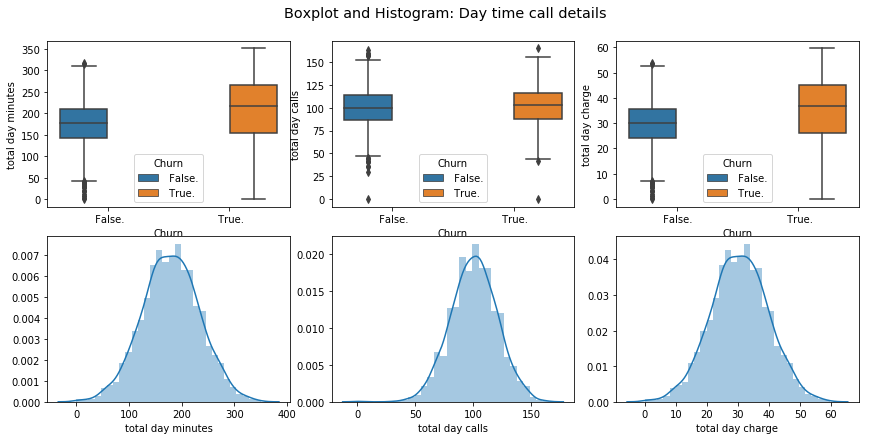

In [18]:
#Histogram and boxplot for day minutes, calls and charge
hist_box('total day minutes', 'total day calls', 'total day charge',
                  data = train_set, sup = "Day time call details")
                  

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


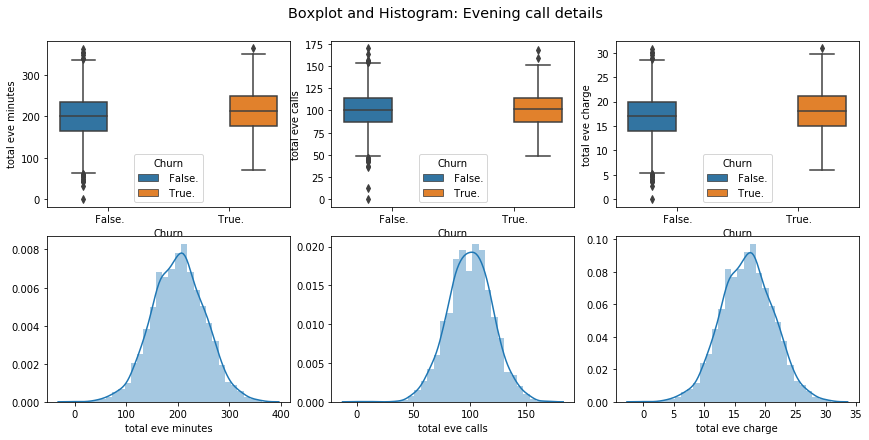

In [19]:
#Histogram and boxplot for minutes,Evening calls and charge
hist_box('total eve minutes', 'total eve calls', 'total eve charge', 
                  data = train_set, sup = "Evening call details")


C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


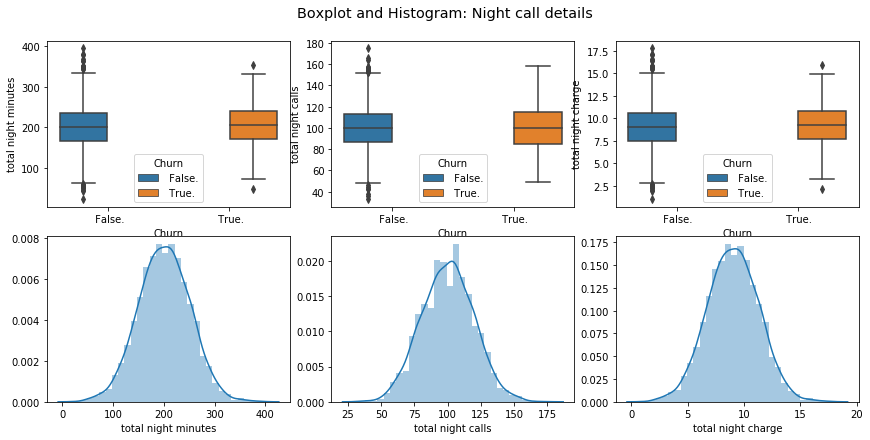

In [20]:
# plotting histogram and boxplot for night calls, minute and charges 
hist_box('total night minutes', 'total night calls', 'total night charge', 
data = train_set, sup = "Night call details")

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


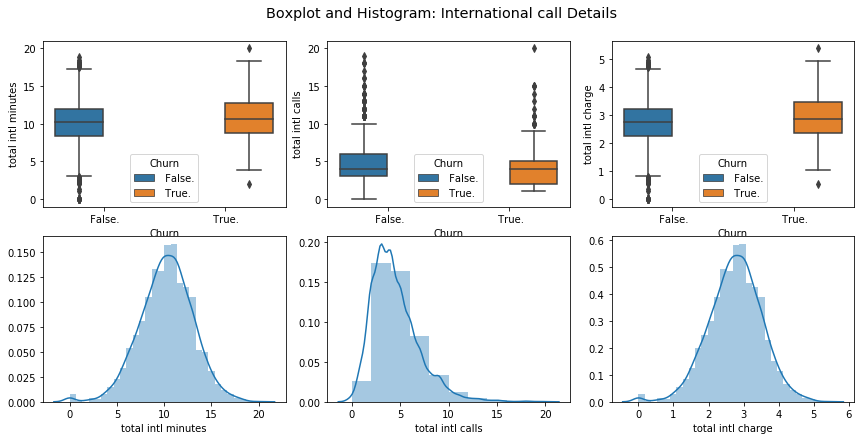

In [21]:
# plotting histogram and boxplot for international calls, minute and charges 
hist_box('total intl minutes', 'total intl calls', 'total intl charge', 
                  data = train_set, bin2=10,sup="International call Details")

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


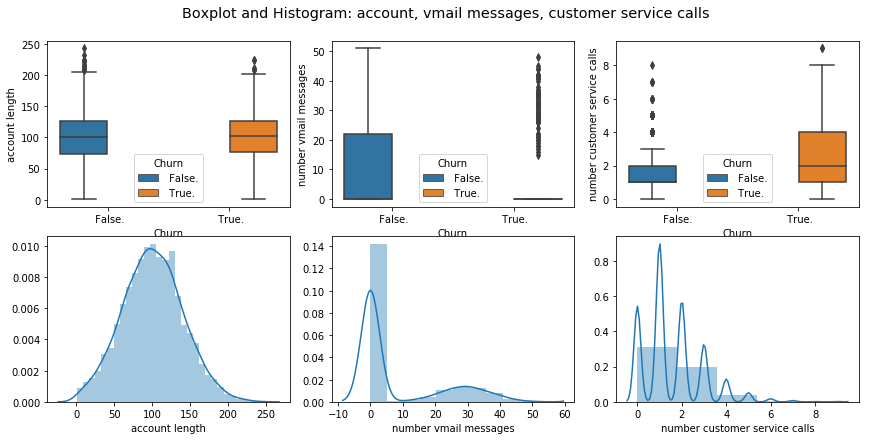

In [22]:
# plot for account length , vmail messages and customer service calls 
hist_box('account length','number vmail messages','number customer service calls', 
                  data = train_set, bin2 = 10, bin3 = 5, sup = "account, vmail messages, customer service calls")

In [16]:
#Creating a new dataset with no outlier with the existing training set
no_outlier=train_set.copy()

In [17]:
# getting all numeric columns 
numerical = list(train_set.columns[train_set.dtypes != 'category'])

In [18]:
# removing numeric columns for which we will not do outlier removal process 
numerical.remove('number vmail messages') 
numerical.remove('number customer service calls')

In [19]:
for i in numerical: 
    q75, q25 = np.percentile(no_outlier.loc[:,i], [75 ,25]) 
    iqr = q75 - q25 
    min = q25 - (iqr*1.5) 
    max = q75 + (iqr*1.5) 
    no_outlier = no_outlier.drop( 
        no_outlier[no_outlier.loc[:,i] < min].index) 
    no_outlier = no_outlier.drop( 
        no_outlier[no_outlier.loc[:,i] > max].index)

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


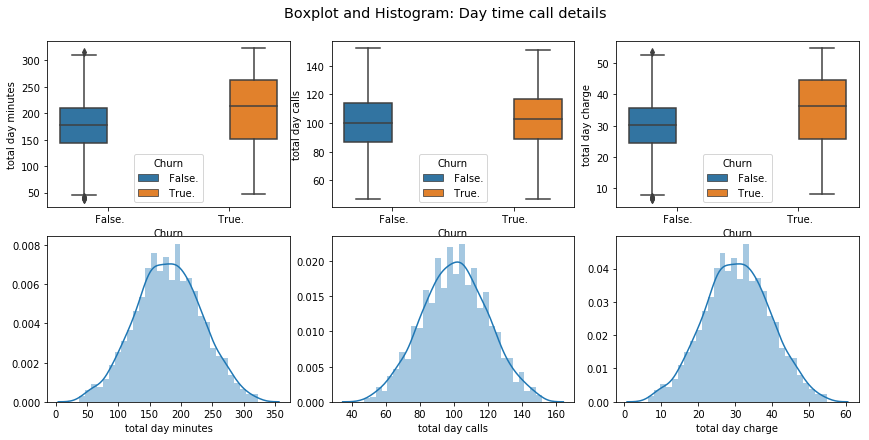

In [28]:
# plotting histogram and boxplot for day calls, minute and charges for no_outlier 
hist_box('total day minutes', 'total day calls', 'total day charge', 
                  data = no_outlier, sup = "Day time call details")

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


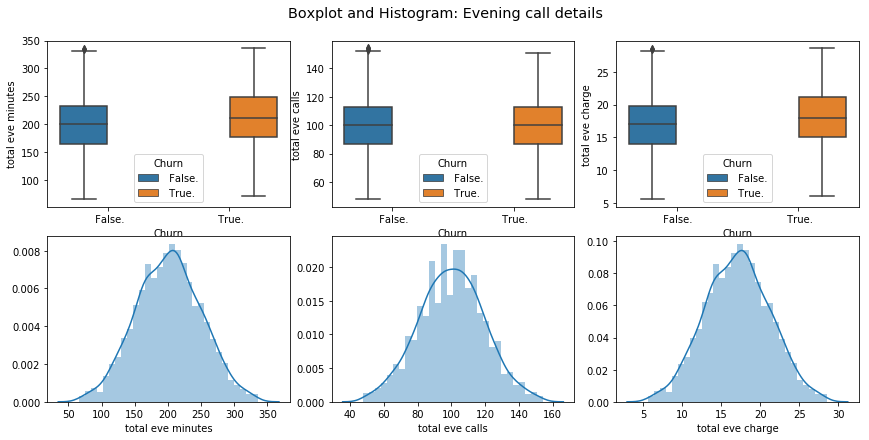

In [29]:
#plotting histogram and boxplot for evening calls, minute and charges for no_outlier 
hist_box('total eve minutes', 'total eve calls', 'total eve charge', 
                  data = no_outlier, sup = "Evening call details")

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


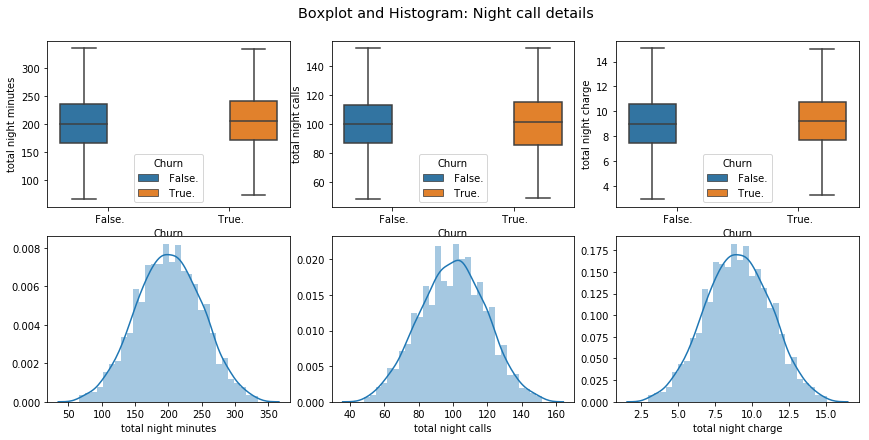

In [30]:
# plotting histogram and boxplot for night calls, minute and charges for no_outlier 
hist_box('total night minutes', 'total night calls', 'total night charge', 
                  data = no_outlier, sup = "Night call details")

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


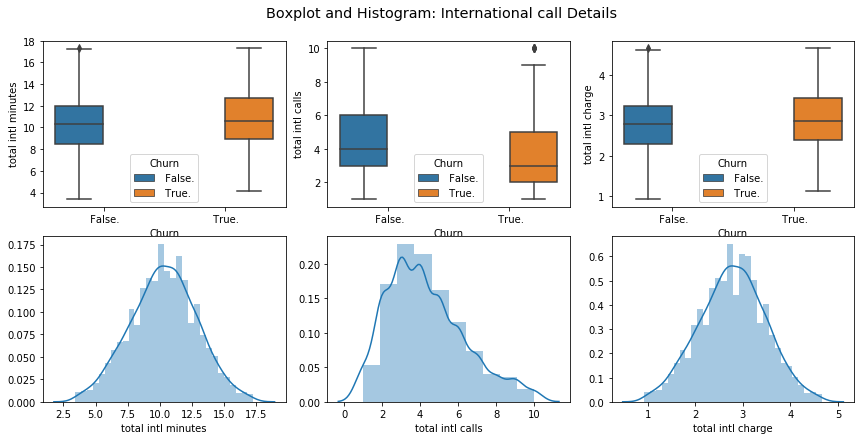

In [31]:
#plotting histogram and boxplot for international detail for no_outlier 
hist_box('total intl minutes', 'total intl calls', 'total intl charge', 
                  data = no_outlier, bin2=10, sup="International call Details")

In [20]:
################# Feature Selection #################

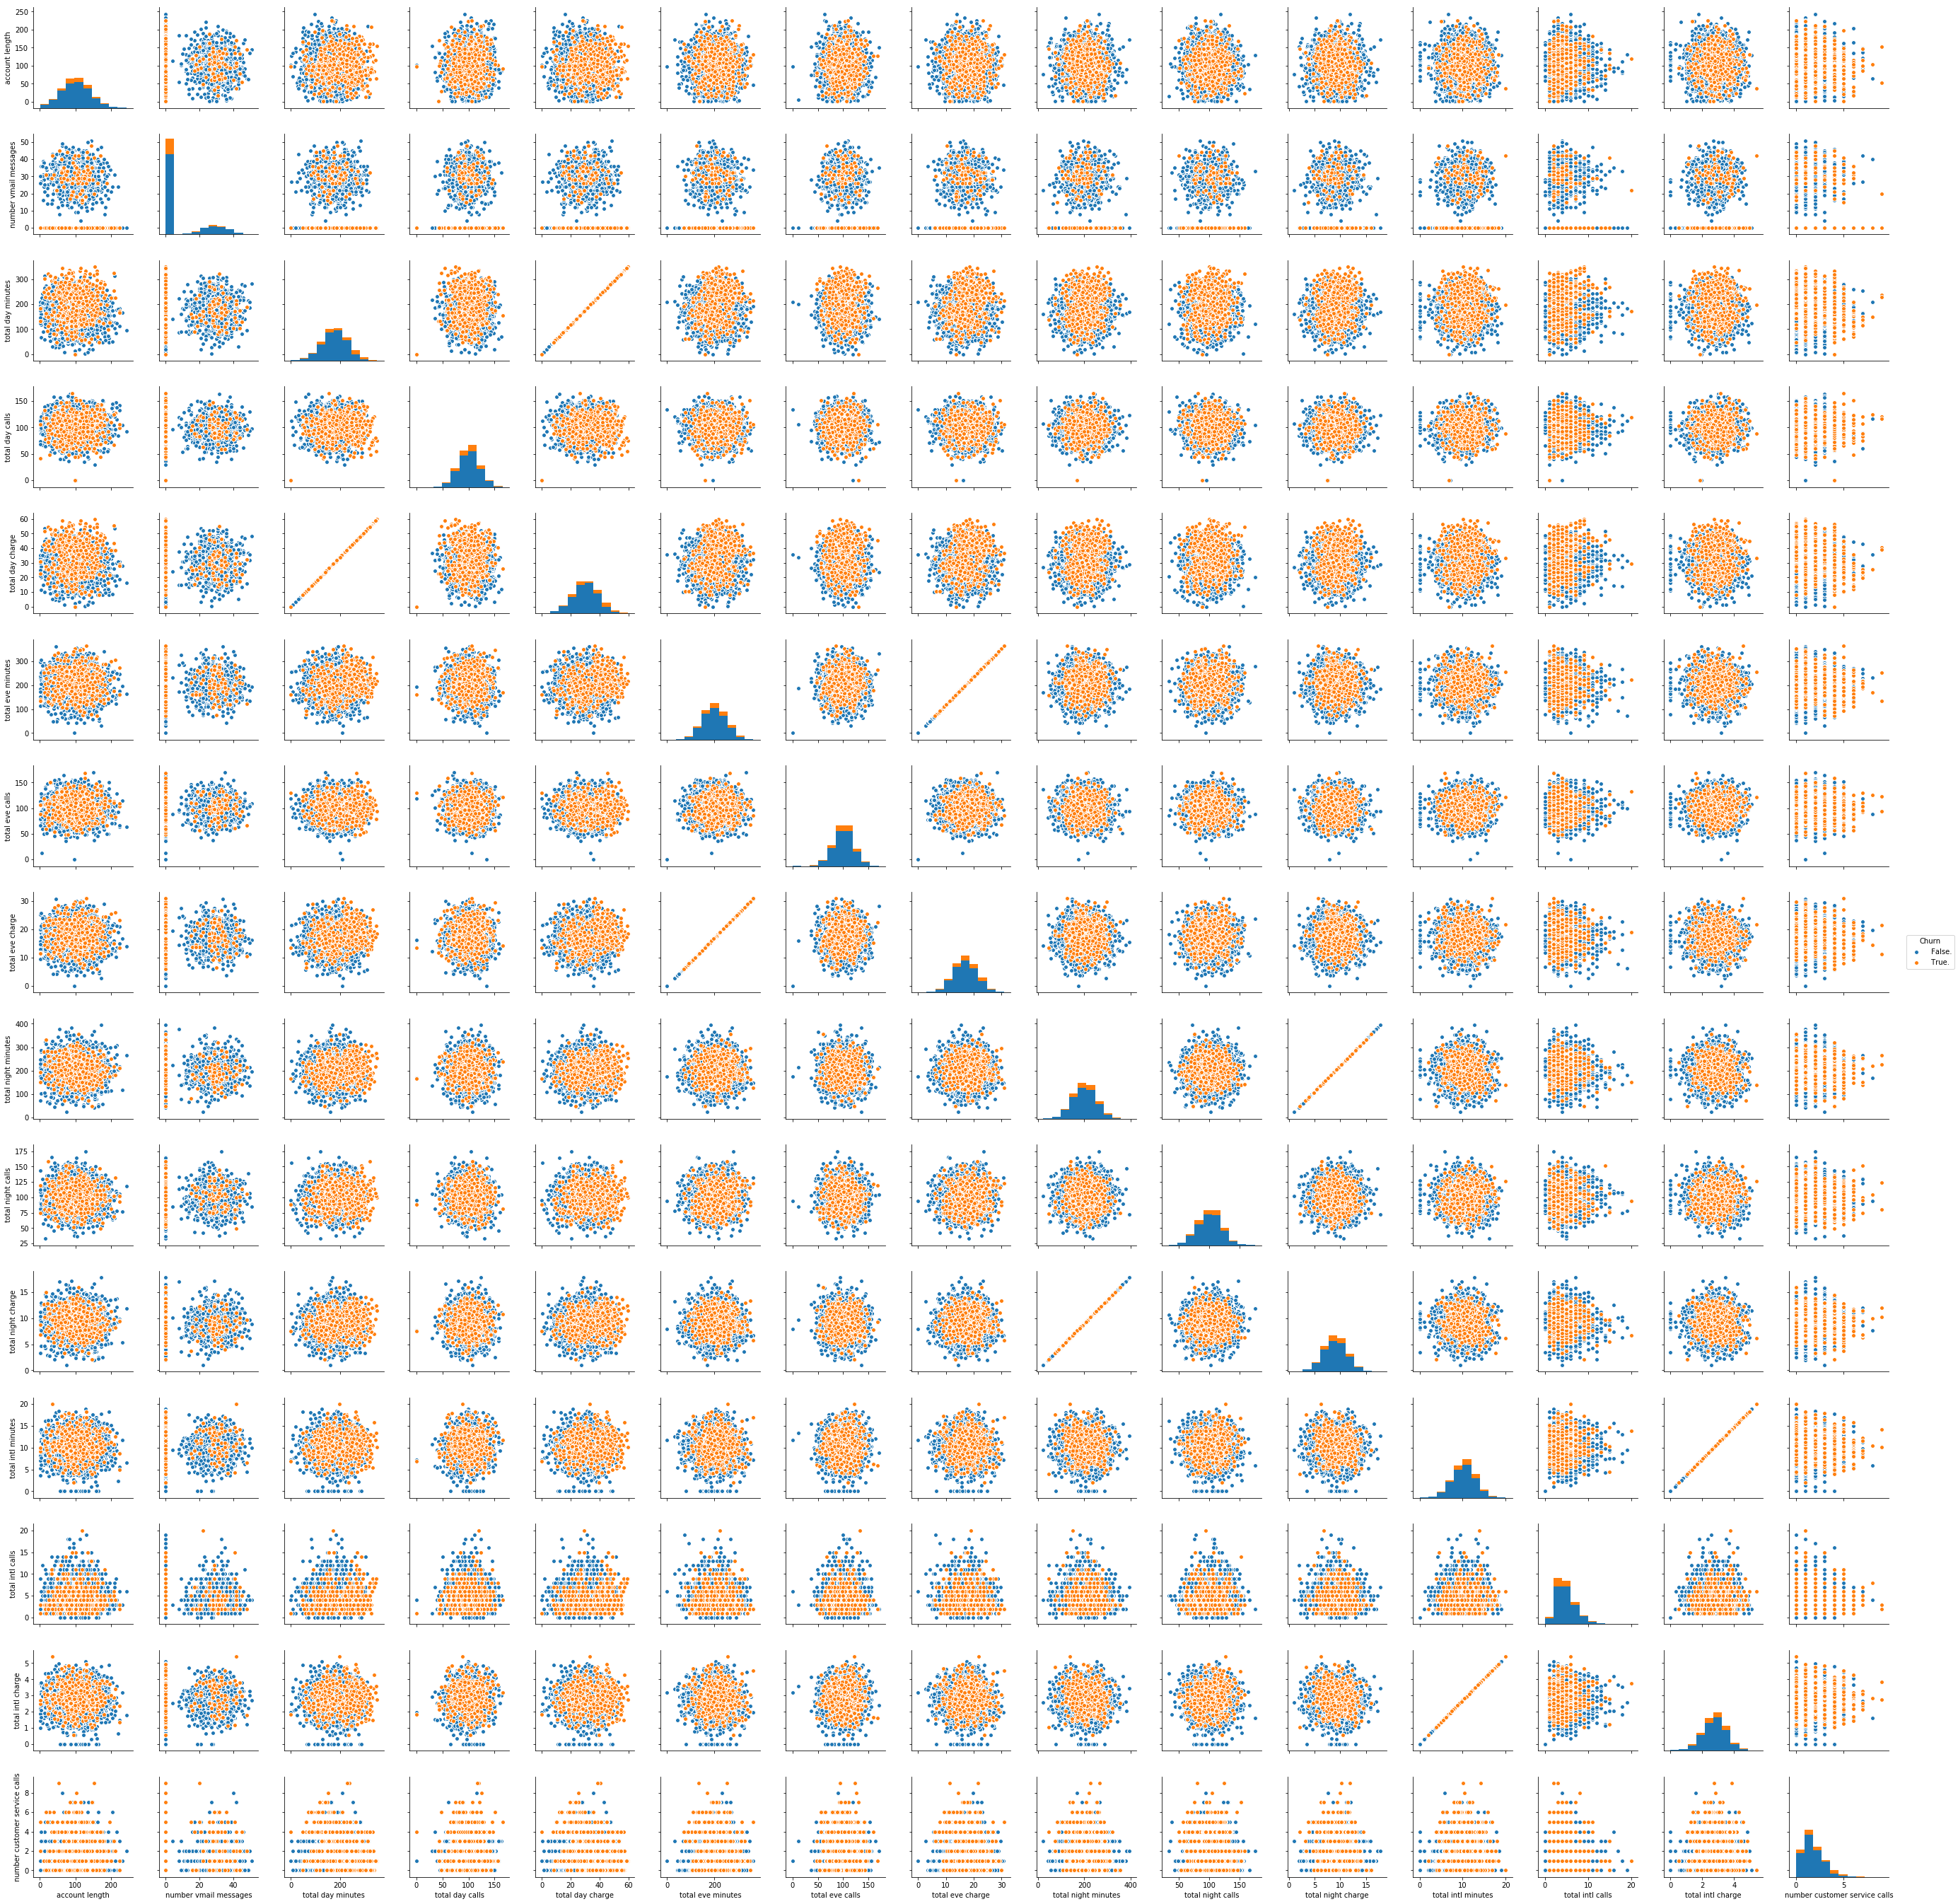

In [21]:
# Correlation plot between numerical values
numerical = list(train_set.columns[train_set.dtypes != 'category']) 
sns.pairplot(data = train_set, x_vars= numerical, y_vars= numerical, hue = 'Churn')

In [ ]:
# heat map plot between numerical values 
diagram = plt.figure(figsize = (14,10))
correlation = train_set[numerical].corr() 
sns.heatmap(correlation, mask = np.zeros_like(correlation, dtype = np.bool), square = True, 
            annot= True, cmap = sns.diverging_palette(220, 10, as_cmap= True)) 
plt.title("HeatMap between numerical columns of churn dataset")

In [22]:
# checking dependency between churn and independent variable (category)
category_var = ['state', 'area code', 'international plan', 'voice mail plan'] 
from scipy.stats import chi2_contingency 
print("Chi-square - test of independence") 
print("=================================") 
for i in category_var: 
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_set['Churn'], train_set[i])) 
    print("p-value between Churn and {}".format(i)) 
    print(p) 
    print('----------------------------')

Chi-square - test of independence
p-value between Churn and state
0.002296221552011188
----------------------------
p-value between Churn and area code
0.9150556960243712
----------------------------
p-value between Churn and international plan
2.4931077033159556e-50
----------------------------
p-value between Churn and voice mail plan
5.15063965903898e-09
----------------------------


In [23]:
# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_set['international plan'], 
                                                train_set['voice mail plan'])) 
print("p-value between international plan and voice mail plan") 
print(p) 
print('----------------------------')

p-value between international plan and voice mail plan
0.7784680822485827
----------------------------


In [24]:
# Dropping state, area code and phone number as they are not giving infomation 
train_set = train_set.drop(columns=['state', 'area code', 'phone number']) 
no_outlier = no_outlier.drop(columns=['state','area code','phone number']) 
test_set = test_set.drop(columns=['state', 'area code', 'phone number'])

In [25]:
# changing categories to levels (0 and 1) 
categorical = train_set.columns[train_set.dtypes == 'category'] 
for i in categorical: 
    train_set[i] = train_set[i].cat.codes 
    no_outlier[i] = no_outlier[i].cat.codes 
    test_set[i] = test_set[i].cat.codes

In [26]:
# checking importance of feature
from sklearn.ensemble import ExtraTreesClassifier 
classifier = ExtraTreesClassifier(n_estimators=200) 
X = train_set.drop(columns=['Churn']) 
y = train_set['Churn'] 
classifier.fit(X,y) 
important_feature = pd.DataFrame({'Feature': train_set.drop(columns=["Churn"]).columns, 
                         'importance':classifier.feature_importances_}) 
important_feature.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,total day charge,0.131216
1,total day minutes,0.128512
2,number customer service calls,0.128126
3,international plan,0.074969
4,total eve minutes,0.061798
5,total eve charge,0.059743
6,total intl calls,0.055304
7,total intl minutes,0.047786
8,total intl charge,0.046423
9,total night charge,0.041108


In [27]:
# Checking VIF values of numeric columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant 
numeric_df = add_constant(train_set[numerical]) 
factor = pd.Series([vif(numeric_df.values, i) 
                 for i in range(numeric_df.shape[1])], 
                index = numeric_df.columns) 
factor.round(1)

const                                 142.9
account length                          1.0
number vmail messages                   1.0
total day minutes                10474222.2
total day calls                         1.0
total day charge                 10474226.8
total eve minutes                 2236930.8
total eve calls                         1.0
total eve charge                  2236932.0
total night minutes                638715.2
total night calls                       1.0
total night charge                 638713.8
total intl minutes                  69016.5
total intl calls                        1.0
total intl charge                   69017.2
number customer service calls           1.0
dtype: float64

In [28]:
# Deleting multicollinear columns 
train_set=train_set.drop(columns=['total day minutes','total eve charge',
                                          'total night charge', 'total intl charge']) 
no_outlier=no_outlier.drop(columns=['total day minutes','total eve charge', 
                                                'total night charge', 'total intl charge']) 
test_set = test_set.drop(columns=['total day minutes','total eve charge', 
                                          'total night charge', 'total intl charge'])

In [29]:
# checking again VIF after removal of multicollinear columns 
numerical = list(train_set.columns[3:13]) 
numerical.insert(0, 'account length') 
numeric_df = add_constant(train_set[numerical]) 
vif = pd.Series([vif(numeric_df.values, i) 
                 for i in range(numeric_df.shape[1])], 
                index = numeric_df.columns) 
vif.round(1)

const                            142.9
account length                     1.0
number vmail messages              1.0
total day calls                    1.0
total day charge                   1.0
total eve minutes                  1.0
total eve calls                    1.0
total night minutes                1.0
total night calls                  1.0
total intl minutes                 1.0
total intl calls                   1.0
number customer service calls      1.0
dtype: float64

In [30]:
# splitting in X and y for train and test 
# X_train -> whole datset 
# X_train_no -> dataset after removal of outliers 
X_train = train_set.drop('Churn', axis = 1) 
y_train = train_set['Churn'] 
X_train_no = no_outlier.drop('Churn', axis =1) 
y_train_no = no_outlier['Churn'] 
X_test = test_set.drop('Churn', axis = 1) 
y_test = test_set['Churn']

In [31]:
################# Classification Model #################

In [32]:
# A function to fit and predict result (Confusion Matrix) 
# and performance (K-fold CV) 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score 
def fit_predict_show_performance(classifier, X_train, y_train): 
    # fitting model 
    classifier.fit(X_train, y_train) 
    churn_prediction = classifier.predict(X_test) 
    # K-fold CV scores for K = 10 
    ten_performances = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10) 
    k_fold_performance = ten_performances.mean() 
    print("K-fold cross validation score of model for k = 10 is :") 
    print(k_fold_performance) 
    print("====================================") 
    print("====== Classification Report ======= ") 
    cr = classification_report(y_test,churn_prediction) 
    print(cr) 
    print("====== Confusion matrix ======= ") 
    cm = confusion_matrix(y_test,churn_prediction) 
    print(cm) 
    return [churn_prediction, cr, cm]

In [33]:
################# Logistic Regression Algorithm #################

In [34]:
# Building Logistic Regression for train_set i.e. with outliers 
from sklearn.linear_model import LogisticRegression 
churn_classifier = LogisticRegression() 
fit_predict_show_performance(churn_classifier, X_train, y_train)


K-fold cross validation score of model for k = 10 is :
0.860186833540127
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1443
          1       0.60      0.18      0.28       224

avg / total       0.85      0.87      0.84      1667

====== Confusion matrix ======= 
[[1416   27]
 [ 183   41]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.89      0.98      0.93      1443\n          1       0.60      0.18      0.28       224\n\navg / total       0.85      0.87      0.84      1667\n',
 array([[1416,   27],
        [ 183,   41]], dtype=int64)]

In [35]:
# Building Logistic Regression for no_outlier i.e. without outliers 
churn_classify = LogisticRegression() 
fit_predict_show_performance(churn_classify, X_train_no, y_train_no)

K-fold cross validation score of model for k = 10 is :
0.8618433388598465
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1443
          1       0.61      0.18      0.28       224

avg / total       0.85      0.87      0.84      1667

====== Confusion matrix ======= 
[[1417   26]
 [ 183   41]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.89      0.98      0.93      1443\n          1       0.61      0.18      0.28       224\n\navg / total       0.85      0.87      0.84      1667\n',
 array([[1417,   26],
        [ 183,   41]], dtype=int64)]

In [36]:
################# K-Nearest Neighbour Algorithm #################

In [38]:
# K- Nearet Neighbours for train_set i.e. dataset with outliers
from sklearn.neighbors import KNeighborsClassifier 
churn_classify = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p =2) 
fit_predict_show_performance(churn_classify, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.8517874161586738
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1443
          1       0.40      0.08      0.13       224

avg / total       0.81      0.86      0.82      1667

====== Confusion matrix ======= 
[[1418   25]
 [ 207   17]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.87      0.98      0.92      1443\n          1       0.40      0.08      0.13       224\n\navg / total       0.81      0.86      0.82      1667\n',
 array([[1418,   25],
        [ 207,   17]], dtype=int64)]

In [39]:
# knn for dataset without outliers 
churn_classify = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p =2) 
fit_predict_show_performance(churn_classify, X_train_no, y_train_no)

K-fold cross validation score of model for k = 10 is :
0.8526381769273714
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1443
          1       0.38      0.07      0.11       224

avg / total       0.80      0.86      0.81      1667

====== Confusion matrix ======= 
[[1418   25]
 [ 209   15]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.87      0.98      0.92      1443\n          1       0.38      0.07      0.11       224\n\navg / total       0.80      0.86      0.81      1667\n',
 array([[1418,   25],
        [ 209,   15]], dtype=int64)]

In [40]:
################# Naive Bayes Algorithm ################# 

In [41]:
# Naive bayes with outlier
from sklearn.naive_bayes import GaussianNB 
churn_classify = GaussianNB() 
fit_predict_show_performance(churn_classify, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.8514835194475913
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      1443
          1       0.47      0.40      0.43       224

avg / total       0.85      0.86      0.85      1667

====== Confusion matrix ======= 
[[1342  101]
 [ 135   89]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.91      0.93      0.92      1443\n          1       0.47      0.40      0.43       224\n\navg / total       0.85      0.86      0.85      1667\n',
 array([[1342,  101],
        [ 135,   89]], dtype=int64)]

In [42]:
# Naive bayes without outlier
churn_classify = GaussianNB() 
fit_predict_show_performance(churn_classify, X_train_no, y_train_no)

K-fold cross validation score of model for k = 10 is :
0.8503431020092822
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      1443
          1       0.47      0.39      0.43       224

avg / total       0.85      0.86      0.85      1667

====== Confusion matrix ======= 
[[1344   99]
 [ 136   88]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.91      0.93      0.92      1443\n          1       0.47      0.39      0.43       224\n\navg / total       0.85      0.86      0.85      1667\n',
 array([[1344,   99],
        [ 136,   88]], dtype=int64)]

In [43]:
################# Decision Tree Algorithm ################# 

In [44]:
# Decision tree classifier for train_set with outliers 
from sklearn.tree import DecisionTreeClassifier 
churn_classify = DecisionTreeClassifier(criterion = 'entropy', random_state=1) 
fit_predict_show_performance(churn_classify, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9225899552246858
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1443
          1       0.78      0.71      0.74       224

avg / total       0.93      0.93      0.93      1667

====== Confusion matrix ======= 
[[1399   44]
 [  66  158]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.95      0.97      0.96      1443\n          1       0.78      0.71      0.74       224\n\navg / total       0.93      0.93      0.93      1667\n',
 array([[1399,   44],
        [  66,  158]], dtype=int64)]

In [45]:
# Decision tree classifier for no_outlier without outliers 
churn_classify = DecisionTreeClassifier(criterion = 'entropy', random_state=1) 
fit_predict_show_performance(churn_classify, X_train_no, y_train_no)

K-fold cross validation score of model for k = 10 is :
0.9196283631370294
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.95      0.94      0.95      1443
          1       0.67      0.71      0.69       224

avg / total       0.92      0.91      0.91      1667

====== Confusion matrix ======= 
[[1363   80]
 [  65  159]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.95      0.94      0.95      1443\n          1       0.67      0.71      0.69       224\n\navg / total       0.92      0.91      0.91      1667\n',
 array([[1363,   80],
        [  65,  159]], dtype=int64)]

In [46]:
################# Hyperparameter Tuning #################

In [47]:
# hyperparameter tuning for Decision tree classifier 
from sklearn.model_selection import GridSearchCV 
churn_classify = DecisionTreeClassifier(random_state=1) 
params = [{'criterion':['entropy', 'gini'], 
           'max_depth':[6,8,10,12,20],'class_weight':['balanced',{0:0.45, 1:0.55}, 
                                                      {0:0.55,1:0.45},{0:0.40,1:0.60}],'random_state' :[1]}] 
grid_search = GridSearchCV(estimator=churn_classify, param_grid=params, 
                           scoring = 'f1', cv = 10, n_jobs=-1)

In [48]:
# tuning Decision Tree for dataset with outlier i.e.train_set 
grid_search = grid_search.fit(X_train, y_train) 
grid_search.best_params_

{'class_weight': {0: 0.55, 1: 0.45},
 'criterion': 'entropy',
 'max_depth': 8,
 'random_state': 1}

In [49]:
#Decision tree classifier for train_set i.e. with outliers after tuning parameter 
from sklearn.tree import DecisionTreeClassifier 
churn_classify = DecisionTreeClassifier(criterion = 'entropy',
                                          class_weight={0:0.55, 1:0.45},max_depth=8, 
                                          random_state=1) 
fit_predict_show_performance(churn_classify, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9441953929977883
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1443
          1       0.91      0.66      0.76       224

avg / total       0.94      0.95      0.94      1667

====== Confusion matrix ======= 
[[1429   14]
 [  77  147]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.95      0.99      0.97      1443\n          1       0.91      0.66      0.76       224\n\navg / total       0.94      0.95      0.94      1667\n',
 array([[1429,   14],
        [  77,  147]], dtype=int64)]

In [50]:
# hyperparameter tuning for Decision tree for dataset without outliers 
from sklearn.model_selection import GridSearchCV 
churn_classify = DecisionTreeClassifier(random_state=1) 
params = [{'criterion':['entropy', 'gini'], 
           'max_depth': [6, 8, 10, 12], 'class_weight':['balanced', {0:0.45, 1:0.55}, 
                                                        {0:0.55, 1:0.45}, {0:0.40, 1:0.60}], 'random_state' :[1]}] 
grid_search = GridSearchCV(estimator=churn_classify, param_grid=params, scoring = 'f1', cv = 10, n_jobs=-1) 
grid_search = grid_search.fit(X_train_no, y_train_no) 
grid_search.best_params_

{'class_weight': {0: 0.45, 1: 0.55},
 'criterion': 'gini',
 'max_depth': 8,
 'random_state': 1}

In [51]:
# Decision tree classifier for dataset without outliers
churn_classify=DecisionTreeClassifier(criterion = 'gini', max_depth = 8, 
                                        class_weight={0:0.45,1:0.55},random_state=1) 
fit_predict_show_performance(churn_classify, X_train_no, y_train_no)

K-fold cross validation score of model for k = 10 is :
0.9402918196326562
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1443
          1       0.83      0.65      0.73       224

avg / total       0.93      0.94      0.93      1667

====== Confusion matrix ======= 
[[1414   29]
 [  78  146]]


[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 '             precision    recall  f1-score   support\n\n          0       0.95      0.98      0.96      1443\n          1       0.83      0.65      0.73       224\n\navg / total       0.93      0.94      0.93      1667\n',
 array([[1414,   29],
        [  78,  146]], dtype=int64)]